In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
#sklearn
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# for scaling the data
from sklearn.preprocessing import scale
# for evaluating the model
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree

from sklearn.metrics import confusion_matrix,classification_report
# techniques used to handling imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# Import the dataset
Diabetes = pd.read_csv("/content/drive/MyDrive/AI/final/diabetes_prediction_dataset.csv")

In [4]:
Diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
99996,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
99997,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
99998,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [5]:
Diabetes.shape

(100000, 9)

In [6]:
Diabetes.isnull().sum()

gender                 3
age                    3
hypertension           2
heart_disease          7
smoking_history        7
bmi                    4
HbA1c_level            7
blood_glucose_level    5
diabetes               1
dtype: int64

In [7]:
# here i handeled irrelevant data because the Name and the Ticket arent helpful
Diab_cl = Diabetes.dropna()
Diab_cl.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
Diab_cl = Diab_cl[Diab_cl['smoking_history'] != 'No Info']

In [9]:
Diab_cl

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
5,Female,20.0,0.0,0.0,never,27.32,6.6,85.0,0.0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0.0,0.0,never,34.34,6.5,160.0,0.0
99993,Female,40.0,0.0,0.0,never,40.69,3.5,155.0,0.0
99997,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
99998,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [10]:
Diab_cl.shape

(64152, 9)

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
cat=Diab_cl.select_dtypes("object").columns
print(cat)

Index(['gender', 'smoking_history'], dtype='object')


In [13]:
cat=cat
for x in cat:
  Diab_cl[x]=le.fit_transform(Diab_cl[x])


In [14]:
Diab_cl['diabetes'] = Diab_cl['diabetes'].astype(int)

In [48]:
Diab_cl.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0.0,1.0,3,25.19,6.6,140.0,0
2,1,28.0,0.0,0.0,3,27.32,5.7,158.0,0
3,0,36.0,0.0,0.0,0,23.45,5.0,155.0,0
4,1,76.0,1.0,1.0,0,20.14,4.8,155.0,0
5,0,20.0,0.0,0.0,3,27.32,6.6,85.0,0
6,0,44.0,0.0,0.0,3,19.31,6.5,200.0,1
8,1,42.0,0.0,0.0,3,33.64,4.8,145.0,0
9,0,32.0,0.0,0.0,3,27.32,5.0,100.0,0
10,0,53.0,0.0,0.0,3,27.32,6.1,85.0,0
11,0,54.0,0.0,0.0,2,54.70,6.0,100.0,0


In [16]:
Diab_cl.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.021712,0.027781,0.091752,-0.078320,0.011335,0.028871,0.030177,0.056735
age,0.021712,1.000000,0.252199,0.237955,-0.028287,0.161226,0.115963,0.116956,0.260737
hypertension,0.027781,0.252199,1.000000,0.117200,-0.017014,0.130026,0.086933,0.086610,0.192099
heart_disease,0.091752,0.237955,0.117200,1.000000,-0.039603,0.037748,0.072982,0.078820,0.169677
smoking_history,-0.078320,-0.028287,-0.017014,-0.039603,1.000000,-0.031041,-0.005360,-0.010290,-0.018019
bmi,0.011335,0.161226,0.130026,0.037748,-0.031041,1.000000,0.085030,0.094919,0.204506
HbA1c_level,0.028871,0.115963,0.086933,0.072982,-0.005360,0.085030,1.000000,0.194505,0.438849
blood_glucose_level,0.030177,0.116956,0.086610,0.078820,-0.010290,0.094919,0.194505,1.000000,0.449709
diabetes,0.056735,0.260737,0.192099,0.169677,-0.018019,0.204506,0.438849,0.449709,1.000000


### **splitting the data**

In [17]:
X = Diab_cl.drop(['diabetes'], axis=1)
y = Diab_cl['diabetes']

In [18]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=0)
y_train.value_counts()

0    48539
1     5990
Name: diabetes, dtype: int64

In [20]:
ros = RandomOverSampler(random_state=0) # preparing the over sampling
X_resampled, y_resampled =ros.fit_resample(X_train, y_train) # making new X and y after the over sampling

In [21]:
'''X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.long)

X_resampled = torch.tensor(X_resampled, dtype=torch.float)
y_resampled = torch.tensor(y_resampled, dtype=torch.long)'''

'X_train = torch.tensor(X_train, dtype=torch.float)\ny_train = torch.tensor(y_train, dtype=torch.long)\nX_test = torch.tensor(X_test, dtype=torch.float)\ny_test = torch.tensor(y_test, dtype=torch.long)\n\nX_resampled = torch.tensor(X_resampled, dtype=torch.float)\ny_resampled = torch.tensor(y_resampled, dtype=torch.long)'

In [22]:
y_resampled.value_counts()

0    48539
1    48539
Name: diabetes, dtype: int64

### **logistic regression before over sampling**

In [23]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_pred_LR=LR.predict(X_test)

In [25]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,y_pred_LR)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, y_pred_LR)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, y_pred_LR)))
# But  Classification Report give more details about performance
print(classification_report(y_test, y_pred_LR))

Accuracy=94.86%

precision_score=85.46%

recall_score=63.75%

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8572
           1       0.85      0.64      0.73      1051

    accuracy                           0.95      9623
   macro avg       0.91      0.81      0.85      9623
weighted avg       0.95      0.95      0.95      9623



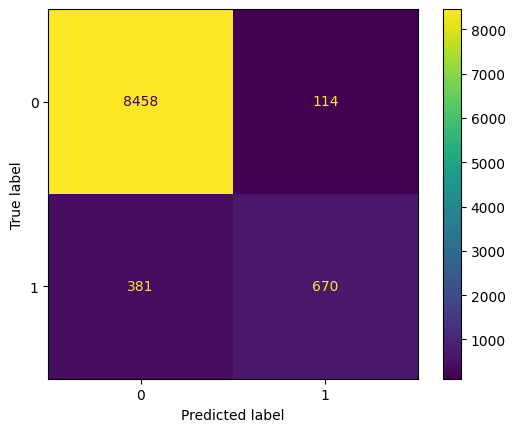

In [26]:
display = ConfusionMatrixDisplay.from_estimator(LR,X_test,y_test,values_format='.22g')

### **logistic regression after over sampling**

In [27]:
LRwithoversampling=LogisticRegression()
LRwithoversampling.fit(X_resampled,y_resampled)

LogisticRegression()

In [28]:
y_pred_LR_over=LRwithoversampling.predict(X_test)

In [29]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,y_pred_LR_over)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, y_pred_LR_over)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, y_pred_LR_over)))
# But  Classification Report give more details about performance
print(classification_report(y_test, y_pred_LR_over))

Accuracy=88.17%

precision_score=47.71%

recall_score=86.39%

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8572
           1       0.48      0.86      0.61      1051

    accuracy                           0.88      9623
   macro avg       0.73      0.87      0.77      9623
weighted avg       0.93      0.88      0.90      9623



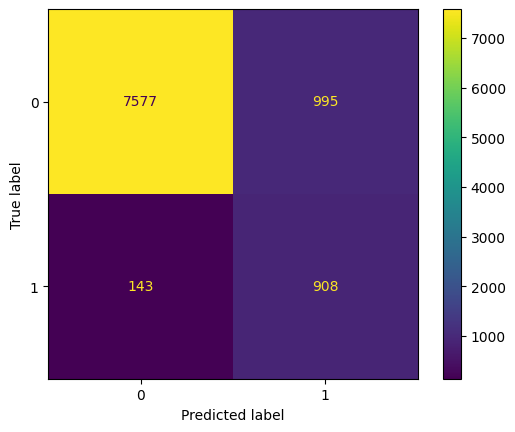

In [30]:
display = ConfusionMatrixDisplay.from_estimator(LRwithoversampling,X_test,y_test,values_format='.22g')

### **Decision Tree classifier**

In [31]:
clf=DecisionTreeClassifier(max_depth=6)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [32]:
y_pred_clf = clf.predict(X_test)
y_pred_clf

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,y_pred_clf)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, y_pred_clf)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, y_pred_clf)))
# But  Classification Report give more details about performance
print(classification_report(y_test, y_pred_clf))

Accuracy=96.27%

precision_score=100.00%

recall_score=65.84%

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8572
           1       1.00      0.66      0.79      1051

    accuracy                           0.96      9623
   macro avg       0.98      0.83      0.89      9623
weighted avg       0.96      0.96      0.96      9623



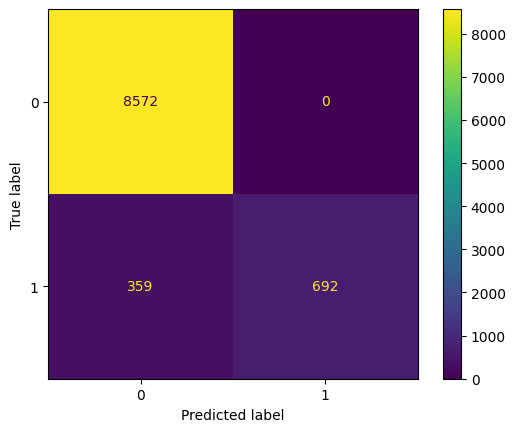

In [34]:
display = ConfusionMatrixDisplay.from_estimator(clf,X_test,y_test,values_format='.2222g')

### **Decision Tree classifier (over sampling)**

In [35]:
clf_over=DecisionTreeClassifier(max_depth=6)
clf_over.fit(X_resampled,y_resampled)

DecisionTreeClassifier(max_depth=6)

In [36]:
y_pred_clf_over=clf_over.predict(X_test)

In [37]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,y_pred_clf_over)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, y_pred_clf_over)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, y_pred_clf_over)))
# But  Classification Report give more details about performance
print(classification_report(y_test, y_pred_clf_over))

Accuracy=81.66%

precision_score=36.79%

recall_score=94.58%

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      8572
           1       0.37      0.95      0.53      1051

    accuracy                           0.82      9623
   macro avg       0.68      0.87      0.71      9623
weighted avg       0.92      0.82      0.85      9623



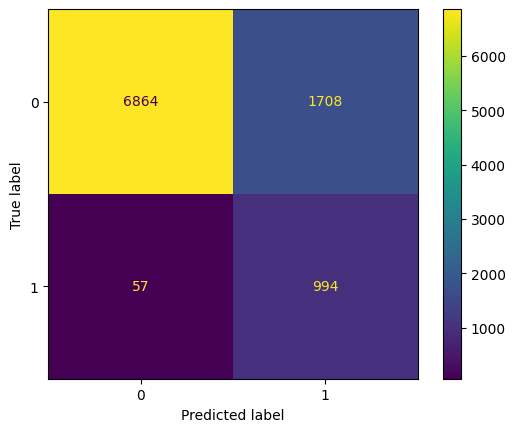

In [38]:
display = ConfusionMatrixDisplay.from_estimator(clf_over,X_test,y_test,values_format='.22g')

### **RandomForestClassifier**


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
RFC = RandomForestClassifier(n_estimators=100, random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
y_pred_RFC = RFC.predict(X_test)

In [42]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,y_pred_RFC)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, y_pred_RFC)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, y_pred_RFC)))
# But  Classification Report give more details about performance
print(classification_report(y_test, y_pred_RFC))

Accuracy=96.06%

precision_score=94.68%

recall_score=67.75%

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8572
           1       0.95      0.68      0.79      1051

    accuracy                           0.96      9623
   macro avg       0.95      0.84      0.88      9623
weighted avg       0.96      0.96      0.96      9623



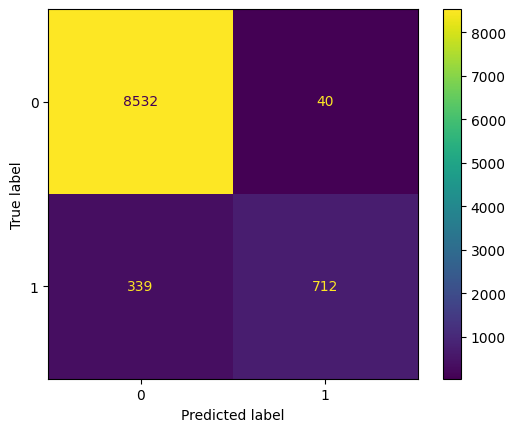

In [43]:
display = ConfusionMatrixDisplay.from_estimator(RFC,X_test,y_test,values_format='.22g')

### **RandomForestClassifier (over sampling)**


In [44]:
RFC_over = RandomForestClassifier(n_estimators=100, random_state=0)
RFC_over.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=0)

In [45]:
y_pred_RFC_over = RFC_over.predict(X_test)

In [46]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,y_pred_RFC_over)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, y_pred_RFC_over)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, y_pred_RFC_over)))
# But  Classification Report give more details about performance
print(classification_report(y_test, y_pred_RFC_over))

Accuracy=95.61%

precision_score=85.78%

recall_score=71.74%

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8572
           1       0.86      0.72      0.78      1051

    accuracy                           0.96      9623
   macro avg       0.91      0.85      0.88      9623
weighted avg       0.95      0.96      0.95      9623



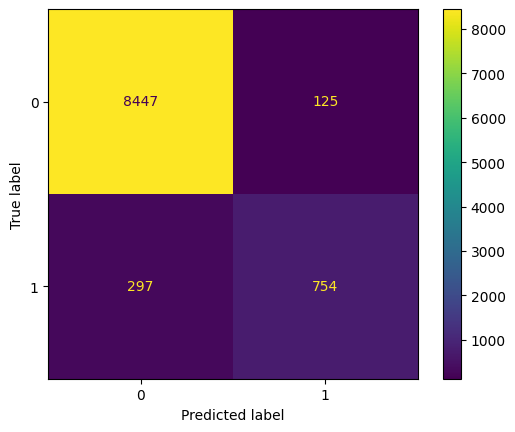

In [47]:
display = ConfusionMatrixDisplay.from_estimator(RFC_over,X_test,y_test,values_format='.22g')